In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
import seaborn as sns

In [2]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Assignment 1: Subplots

Plot The distribution of lodging revenue for our top 5 countries by revenue ("PRT, "ESP", "FRA", "DEU", "GBR").

**Limit Data to Bookings with RoomNights < 15**

Make sure to share both x and y axes and give them titles!

Remove the extra chart with `ax[row, col].set_axis_off()` if using plt.subplots()


In [3]:
top5 = hotels[(hotels["RoomNights"] < 15) & 
              (hotels["Nationality"].isin(["PRT", "ESP", "FRA", "DEU", "GBR"]))]

In [4]:
top5.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

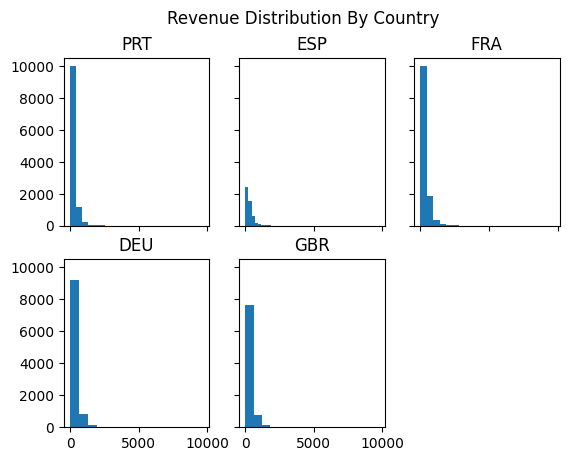

In [5]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)

plt.suptitle("Revenue Distribution By Country")

ax[0][0].hist(
    top5[top5["Nationality"] == "PRT"]["LodgingRevenue"],
    bins = 15
)
ax[0][0].set_title("PRT")

ax[0][1].hist(
    top5[top5["Nationality"] == "ESP"]["LodgingRevenue"],
    bins = 15
)
ax[0][1].set_title("ESP")

ax[0][2].hist(
    top5[top5["Nationality"] == "FRA"]["LodgingRevenue"],
    bins = 15
)
ax[0][2].set_title("FRA")

ax[1][0].hist(
    top5[top5["Nationality"] == "DEU"]["LodgingRevenue"],
    bins = 15
)
ax[1][0].set_title("DEU")

ax[1][1].hist(
    top5[top5["Nationality"] == "GBR"]["LodgingRevenue"],
    bins = 15
)
ax[1][1].set_title("GBR")

ax[1][2].set_axis_off()

plt.show()

# Assignment 2: GridSpec

* Build a Gridspec layout with a line chart plotting Lodging Revenue Vs. Hotel Revenue for all countries at the top of your report.

* Build a bar chart of total revenue (Lodging + Other Revenue) by country for our top 5 countries

* Build a Donut Chart Specifying 67% of the way to our Goal of French Revenue for the year

In [6]:
hotels = hotels.assign(
    date = pd.to_datetime("2018-12-31") - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D"),
    total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"]
)

daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()

C:\Users\matwa\AppData\Local\Temp\ipykernel_25100\3295124538.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = daily_revenue.resample("M").sum()


In [7]:
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


In [8]:
countries = (hotels
    .groupby("Nationality")
    .agg({"RoomNights": "sum", "LodgingRevenue": "sum"})
    .sort_values("RoomNights", ascending=False)
    .iloc[:5]
)

In [9]:
country_name = {"FRA": "France", "DEU": "Germany", "PRT": "Portugal", "GBR": "Great Britain", "ESP": "Spain"}
countries.rename(index=country_name, inplace=True)

In [10]:
goal = [.67, .33]

C:\Users\matwa\AppData\Local\Temp\ipykernel_25100\1346265756.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(countries.index, fontsize="small")


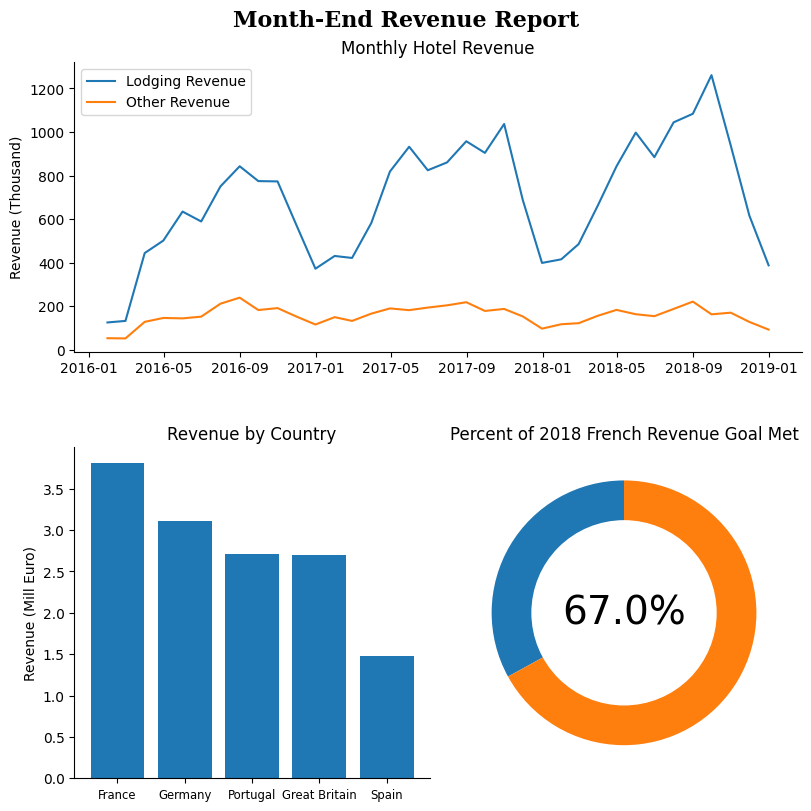

In [11]:
# Build GridSpec
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
fig.suptitle("Month-End Revenue Report",
             fontsize=16,
             fontweight="bold",
             fontfamily="serif")

grid = GridSpec.GridSpec(16, 16, figure=fig)

ax1 = fig.add_subplot(grid[:7, :])
ax1.plot(
    monthly_revenue.index,
    monthly_revenue["LodgingRevenue"]/1000,
    label="Lodging Revenue"
)
ax1.plot(
    monthly_revenue.index,
    monthly_revenue["OtherRevenue"]/1000,
    label="Other Revenue"
)

ax1.set_title("Monthly Hotel Revenue")
ax1.set_ylabel("Revenue (Thousand)")
ax1.legend(loc="upper left")
ax1.spines[["top", "right"]].set_visible(False)

ax2 = fig.add_subplot(grid[8:, :8])

ax2.bar(
    countries.index,
    countries["LodgingRevenue"]/1e6
)
ax2.set_title("Revenue by Country")
ax2.set_ylabel("Revenue (Mill Euro)")
ax2.set_xticklabels(countries.index, fontsize="small")
ax2.spines[["top", "right"]].set_visible(False)

ax3 = fig.add_subplot(grid[8:, 8:])
ax3.pie(
    goal[::-1],
    startangle=90
)
ax3.set_title("Percent of 2018 French Revenue Goal Met")
hole = plt.Circle((0, 0), .7, fc="white")
fig = plt.gcf()

# Adding Cirle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    "67.0%",
    ha="center",
    va="center",
    fontsize=28
)

plt.show()

# Assignment 3: Colors

* Apply the Set2 Colormap to the line chart.
* Look up the national colors of our top 5 countries and color each bar in the bar chart accordingly. The hex codes for colors can be looked up at https://flagcolor.com/.
* Finally, make the donut chart French Blue, and white out the secondary slice.

In [12]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set2.colors)
country_colors = {"France": "#000091",
                  "Germany": "#000000",
                  "Portugal": "#046A38",
                  "Great Britain": "#012169",
                  "Spain": "#AA151B"}

In [13]:
countries["Color"] = countries.index.map(country_colors)
countries

,RoomNights,LodgingRevenue,Color
Nationality,,,
France,31018,3809315.59,#000091
Germany,26334,3113382.55,#000000
Portugal,24334,2715008.72,#046A38
Great Britain,20822,2693123.61,#012169
Spain,10877,1475909.33,#AA151B


C:\Users\matwa\AppData\Local\Temp\ipykernel_25100\3896558355.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(countries.index, fontsize="small")


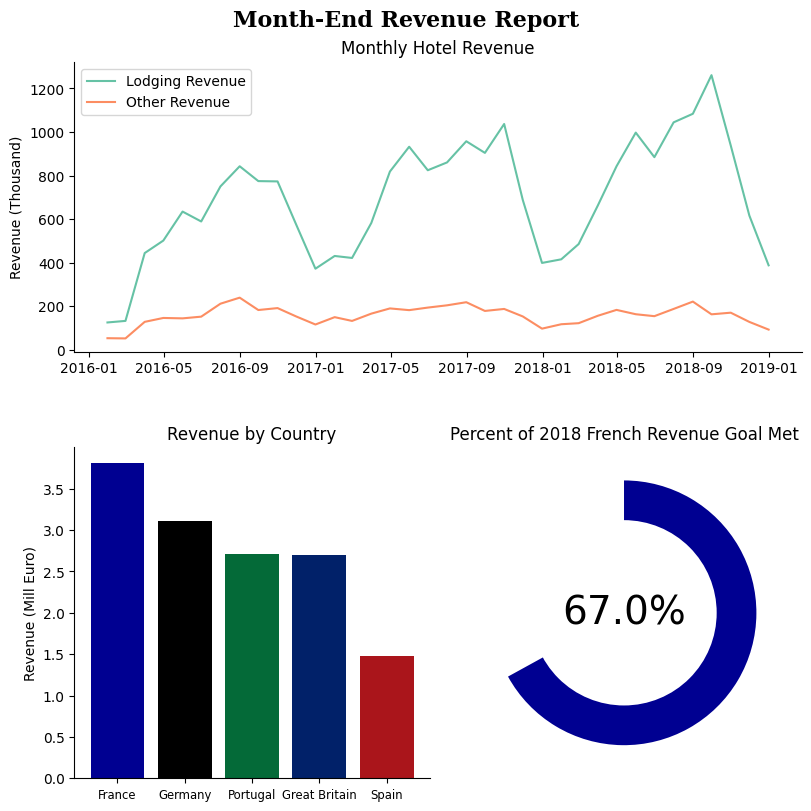

In [14]:
# Build GridSpec
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
fig.suptitle("Month-End Revenue Report",
             fontsize=16,
             fontweight="bold",
             fontfamily="serif")

grid = GridSpec.GridSpec(16, 16, figure=fig)

ax1 = fig.add_subplot(grid[:7, :])
ax1.plot(
    monthly_revenue.index,
    monthly_revenue["LodgingRevenue"]/1000,
    label="Lodging Revenue"
)
ax1.plot(
    monthly_revenue.index,
    monthly_revenue["OtherRevenue"]/1000,
    label="Other Revenue"
)

ax1.set_title("Monthly Hotel Revenue")
ax1.set_ylabel("Revenue (Thousand)")
ax1.legend(loc="upper left")
ax1.spines[["top", "right"]].set_visible(False)

ax2 = fig.add_subplot(grid[8:, :8])

ax2.bar(
    countries.index,
    countries["LodgingRevenue"]/1e6,
    color=countries["Color"]
)
ax2.set_title("Revenue by Country")
ax2.set_ylabel("Revenue (Mill Euro)")
ax2.set_xticklabels(countries.index, fontsize="small")
ax2.spines[["top", "right"]].set_visible(False)

ax3 = fig.add_subplot(grid[8:, 8:])
ax3.pie(
    goal[::-1],
    startangle=90,
    colors=["white", countries.loc["France", "Color"]]
)
ax3.set_title("Percent of 2018 French Revenue Goal Met")
hole = plt.Circle((0, 0), .7, fc="white")
fig = plt.gcf()

# Adding Cirle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    "67.0%",
    ha="center",
    va="center",
    fontsize=28
)

plt.show()

# Assignment 4: Stylesheets
* Apply a stylesheet to the above code

In [15]:
sns.set_style("darkgrid")